# HD 156668

In [9]:
# Importamos librerías
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [10]:
# Constantes astronómicas

G = 6.67430e-11           # m³/kg/s²
M_sun = 1.98847e30        # kg
R_sun = 6.957e8           # m
R_earth = 6.3781e6        # m
UA = 1.495978707e11       # m
day2sec = 86400           # s

In [11]:
# Parámetros estelares aproximados para HD 156668

tipo_espectral = "K3V"
M_star = 0.77 * M_sun     # masa en kg
R_star = 0.72 * R_sun     # radio en m
edad_Gyr = 4.5
ubicacion_HR = "Secuencia principal (zona K)"

In [12]:
# Descargar curva de luz y filtrar sectores válidos

target = "HD 156668"
search_result = lk.search_lightcurve(target)
lc_collection = search_result.download_all()

compatible_lcs = []
for lc in lc_collection:
    try:
        _ = lc.quality
        if lc.quality.dtype.kind in ['i', 'u']:
            compatible_lcs.append(lc)
    except:
        continue

if not compatible_lcs:
    raise ValueError("No hay curvas de luz compatibles para HD 156668.")

from lightkurve import LightCurveCollection
lc = LightCurveCollection(compatible_lcs).stitch().remove_nans().remove_outliers(sigma=5)
median_flux = np.nanmedian(lc.flux)
lc.flux = lc.flux / median_flux  # Normalización segura
lc_flat = lc.flatten(window_length=301)

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]

`period` contains 4252418 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


<AxesSubplot:title={'center':'BLS periodogram for HD 156668'}, xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

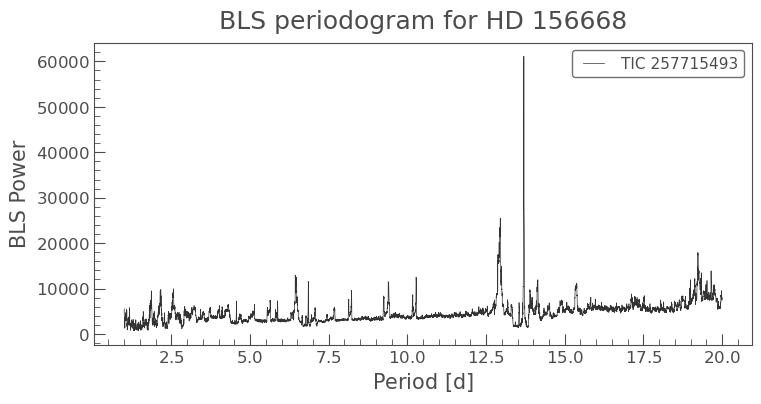

In [13]:
# Análisis de tránsitos con BoxLeastSquares
period_grid = np.linspace(1, 20, 10000)
bls = lc_flat.to_periodogram(method="bls", period=period_grid)
bls.plot(title="BLS periodogram for HD 156668")

In [14]:
# Parámetros del tránsito detectado
period = bls.period_at_max_power.value           # días
t0 = bls.transit_time_at_max_power.value         # BKJD
duration = bls.duration_at_max_power.value       # días
depth = bls.depth_at_max_power.value             # fracción

In [15]:
# Cálculo físico de parámetros planetarios ===
T_sec = period * day2sec
a_m = ((G * M_star * T_sec**2) / (4 * pi**2))**(1/3)
a_AU = a_m / UA
Rp_m = R_star * np.sqrt(depth)
Rp_Re = Rp_m / R_earth
excentricidad = "~0"  # Asumida, no detectable desde curva de luz

In [16]:
# Resultados

print("\n--- PARÁMETROS ESTELARES ---")
print(f"Tipo espectral: {tipo_espectral}")
print(f"Edad estimada: {edad_Gyr} Gyr")
print(f"Ubicación en el HR diagram: {ubicacion_HR}")
print(f"Masa: {M_star/M_sun:.2f} M☉")
print(f"Radio: {R_star/R_sun:.2f} R☉")

print("\n--- PARÁMETROS PLANETARIOS (HD 156668 b) ---")
print(f"Periodo orbital: {period:.4f} días")
print(f"Semieje mayor: {a_AU:.4f} UA")
print(f"Radio planetario: {Rp_Re:.3f} R⊕")
print(f"Excentricidad: {excentricidad}")


--- PARÁMETROS ESTELARES ---
Tipo espectral: K3V
Edad estimada: 4.5 Gyr
Ubicación en el HR diagram: Secuencia principal (zona K)
Masa: 0.77 M☉
Radio: 0.72 R☉

--- PARÁMETROS PLANETARIOS (HD 156668 b) ---
Periodo orbital: 13.7009 días
Semieje mayor: 0.1027 UA
Radio planetario: 7.088 R⊕
Excentricidad: ~0


In [17]:
# Tabla final

planet_data = {
    "Parámetro": ["Periodo (d)", "Radio (R⊕)", "Semieje mayor (UA)", "Excentricidad (e)"],
    "Valor estimado": [f"{period:.4f}", f"{Rp_Re:.3f}", f"{a_AU:.4f}", excentricidad]
}
df = pd.DataFrame(planet_data)
from IPython.display import display
display(df)

,Parámetro,Valor estimado
0,Periodo (d),13.7009
1,Radio (R⊕),7.088
2,Semieje mayor (UA),0.1027
3,Excentricidad (e),~0


### Verificamos los resultados con el NASA Exoplanet Archive

Parámetros:
- Periodo orbital (pl_orbper)
- Radio planetario (pl_rade)
- Semieje mayor (pl_orbsmax)
- Excentricidad (pl_orbeccen)
- Masa y radio estelar (st_mass, st_rad)
- Tipo espectral (st_spectype)
- Edad estelar (st_age)

In [18]:
# Importamos librerías necesarias
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd

C:\Users\maria\AppData\Local\Temp/ipykernel_17940/3484905557.py:2: DeprecationWarning: the ``nasa_exoplanet_archive`` module has been moved to astroquery.ipac.nexsci.nasa_exoplanet_archive, please update your imports.
  from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive


In [20]:
# Consultar con query_criteria en lugar de query_object
df = NasaExoplanetArchive.query_criteria(
    table="pscomppars",
    select="pl_name,pl_orbper,pl_rade,pl_orbsmax,pl_orbeccen,st_mass,st_rad,st_spectype,st_age",
    where="hostname='HD 156668'"
).to_pandas()

In [21]:
# Renombrar columnas para mayor claridad
df.columns = [
    "Planeta", "Periodo (d)", "Radio (R⊕)", "Semieje mayor (UA)", "Excentricidad",
    "Masa estrella (M☉)", "Radio estrella (R☉)", "Tipo espectral", "Edad estelar (Gyr)"
]

In [22]:
# Mostrar resultados
from IPython.display import display
display(df)

,Planeta,Periodo (d),Radio (R⊕),Semieje mayor (UA),Excentricidad,Masa estrella (M☉),Radio estrella (R☉),Tipo espectral,Edad estelar (Gyr)
0,HD 156668 b,4.6455,1.87,0.05,0.000,0.772000,0.720000,K2,8.6
1,HD 156668 c,811.3000,6.17,1.57,0.089,0.785167,0.774528,K2,8.6


### Diagrama de arquitectura del sistema

In [23]:
import matplotlib.pyplot as plt

In [24]:
# Parámetros de HD 156668 b
a_b = 0.1027  # semieje mayor en UA (tu resultado)
R_star_AU = 0.72 * 6.957e8 / 1.496e11  # convertir radio estelar a UA

In [25]:
# Opcional: segundo planeta (HD 156668 c), estimado a ~0.6 UA (literatura)
a_c = 0.6

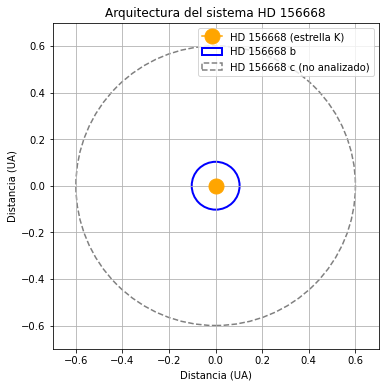

In [26]:
# Crear figura
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect("equal")

# Estrella
ax.plot(0, 0, marker='o', markersize=15, color='orange', label='HD 156668 (estrella K)')

# Órbita del planeta b
circle_b = plt.Circle((0, 0), a_b, color='blue', fill=False, linestyle='-', linewidth=2, label='HD 156668 b')

# (Opcional) Órbita del planeta c
circle_c = plt.Circle((0, 0), a_c, color='gray', fill=False, linestyle='--', linewidth=1.5, label='HD 156668 c (no analizado)')

# Añadir círculos al gráfico
ax.add_patch(circle_b)
ax.add_patch(circle_c)

# Estilo del gráfico
ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.7, 0.7)
ax.set_xlabel("Distancia (UA)")
ax.set_ylabel("Distancia (UA)")
ax.set_title("Arquitectura del sistema HD 156668")
ax.legend(loc="upper right")
plt.grid(True)
plt.show()